# *Python, the efficient way*

Demo code to show off different ways of tackling a programming situation with an efficient, yet understandable Python usage.

## Goal

Convert an array of integers into a string with their ASCII notation, optimizing **time** (and memory, if possible).

In [0]:
# Import required libraries

import timeit
import array

import numpy as np
import pandas as pd

from functools import reduce
from operator import itemgetter

In [2]:
# Generate random vector of numbers

numbers = np.random.randint(low=0, high=255, size=100000)
print(numbers[0:10])

[107 185  15 246 157 139 152  89 101 227]


In [0]:
# Created function to display timing overview of approaches

results = dict()

def show_timing(function, params, n_iterations=100):
  
  f_name = function.__name__
  p_name = [name for name in globals() if globals()[name] is params][0]
  
  t = timeit.timeit('{}({})'.format(f_name, p_name), 
                    number=n_iterations, globals=globals())
  
  results[f_name] = t/n_iterations
  
  print("""-------------------Execution overview-------------------
  
Function to assess:              {}({})
Time elapsed (per execution):    {} s
Number of executions:            {} iterations
--------------------------------------------------------
""".format(f_name, p_name, t/n_iterations, n_iterations))
  
  return

In [0]:
# Function to display sorted results

pd.set_option("display.precision", 15)

def sort_results(res=results):
  
  return pd.DataFrame(results, index=['Time Elapsed (s)']).T.sort_values(by=['Time Elapsed (s)'])

### Approach 1

In [0]:
# Define function for approach 1

def approach_1(nums):
  
    text = ""
    
    for num in nums:
      
        text += chr(num)
        
    return text

In [6]:
show_timing(approach_1, numbers)

-------------------Execution overview-------------------
  
Function to assess:              approach_1(numbers)
Time elapsed (per execution):    0.02325644570999998 s
Number of executions:            100 iterations
--------------------------------------------------------



- Very straightforward, intuitive solution.
- Can it be improved or simplified?

### Approach 2

In [0]:
# Define function for approach 2

def approach_2(nums):
  
  return reduce(lambda text, num: text + chr(num), nums, "")

In [8]:
show_timing(approach_2, numbers)

-------------------Execution overview-------------------
  
Function to assess:              approach_2(numbers)
Time elapsed (per execution):    0.16299940822999986 s
Number of executions:            100 iterations
--------------------------------------------------------



In [9]:
sort_results()

,Time Elapsed (s)
approach_1,0.02325644571
approach_2,0.16299940823


- *One-liner*: more readable.
- Not as intuitive as **approach_1**.
- Gets rid of the *For* loop, in favor of the *reduce()* implicit loop.
- Lambda function call overhead.

### Approach 3

In [0]:
# Define function for approach 3

def approach_3(nums):
  
  text = ""
  
  for char in map(chr, nums):
    
      text = text + char
      
  return text

In [11]:
show_timing(approach_3, numbers)

-------------------Execution overview-------------------
  
Function to assess:              approach_3(numbers)
Time elapsed (per execution):    0.020654121439999926 s
Number of executions:            100 iterations
--------------------------------------------------------



In [12]:
sort_results()

,Time Elapsed (s)
approach_3,0.02065412144
approach_1,0.02325644571
approach_2,0.16299940823


- Uses more storage, since *map(chr, list)* returns another list of the same length.
- Uses 2 loops! So, why is it that fast?
- Unlike **approach_1**, *chr()* is only looked once, within *map()* (function call overhead).
- This look up is first made in the global scope, and then in the built-in scope.
- *map()* calls procedures directly in C language.

### Approach 4

In [0]:
# Define function for approach 4

def approach_4(nums):
  
  text = ""
  
  local_chr = chr
  
  for num in nums:
    
      text = text + local_chr(num)
      
  return text

In [14]:
show_timing(approach_4, numbers)

-------------------Execution overview-------------------
  
Function to assess:              approach_4(numbers)
Time elapsed (per execution):    0.020104891019999512 s
Number of executions:            100 iterations
--------------------------------------------------------



In [15]:
sort_results()

,Time Elapsed (s)
approach_4,0.02010489102
approach_3,0.02065412144
approach_1,0.02325644571
approach_2,0.16299940823


- Similar to **approach_1**, but defines *chr()* in a local context to speed up the search over scopes.
- Still gets fast performance: function call overhead (aforementioned) was most likely speeding the execution down.

### Approach 5

In [0]:
# Define function for approach 5

def approach_5(nums):
  
  return "".join(map(chr, nums))

In [17]:
show_timing(approach_5, numbers)

-------------------Execution overview-------------------
  
Function to assess:              approach_5(numbers)
Time elapsed (per execution):    0.015335431909999215 s
Number of executions:            100 iterations
--------------------------------------------------------



In [18]:
sort_results()

,Time Elapsed (s)
approach_5,0.015335431909999
approach_4,0.020104891020000
approach_3,0.020654121440000
approach_1,0.023256445710000
approach_2,0.162999408230000


- *One-liner*: readable.
- Only uses implicit loops.
- Removes quadratic behaviour of the other versions.

### Approach 6

In [0]:
# Define function for approach 6

def approach_6(nums):
  
  return array.array('B', nums).tobytes()

In [20]:
show_timing(approach_6, numbers)

-------------------Execution overview-------------------
  
Function to assess:              approach_6(numbers)
Time elapsed (per execution):    0.015549887700000226 s
Number of executions:            100 iterations
--------------------------------------------------------



In [21]:
sort_results()

,Time Elapsed (s)
approach_5,0.015335431909999
approach_6,0.015549887700000
approach_4,0.020104891020000
approach_3,0.020654121440000
approach_1,0.023256445710000
approach_2,0.162999408230000


- Speed comparable to **approach_5**.
- Much more memory-efficient that all the previous options.

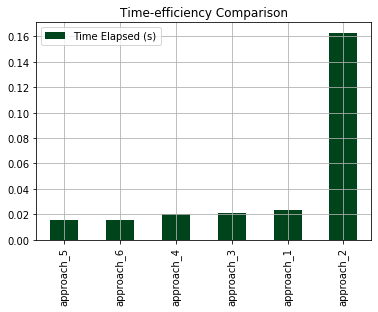

In [22]:
df = sort_results()
df.plot(grid=True, title='Time-efficiency Comparison', kind='bar', colormap="Greens_r")

## Conclusions

- Need for speed? Use built-in functions.

- **KISS**. Only optimize proven bottlenecks.

- Implied loop >> explicit loop.

- Avoid calling functions written in Python in an inner loop (even lambdas).

- Local definitons >> global definitions.

- *map*/*reduce*/*filter* only with built-in functions.

## References

- https://wiki.python.org/moin/PythonSpeed/PerformanceTips

- https://www.python.org/doc/essays/list2str/

- https://www.python-course.eu/python3_lambda.php

- https://www.pythoncentral.io/measure-time-in-python-time-time-vs-time-clock/

- https://realpython.com/fast-flexible-pandas/

- https://greenlab.di.uminho.pt/wp-content/uploads/2017/09/paperSLE.pdf